## Data Generation

### Generate Synthetical Data with Python

<img width="60%" class="imgright" src="../images/robots_creating_data.webp" srcset="../images/robots_creating_data_500w.webp 500w,../images/robots_creating_data_400w.webp 400w,../images/robots_creating_data_350w.webp 350w,../images/robots_creating_data_300w.webp 300w" alt="Robots creating data" />
 
A problem with machine learning, especially when you are starting out and want to learn about the algorithms, is that it is often difficult to get suitable test data. Some cost a lot of money, others are not freely available because they are protected by copyright. Therefore, artificially generated test data can be a solution in some cases.

For this reason, this chapter of our tutorial deals with the artificial generation of data.
This chapter is about creating artificial data.
In the previous chapters of our tutorial we learned that Scikit-Learn (sklearn) contains different data sets. On the one hand, there are small toy data sets, but it also offers larger data sets that are often used in the machine learning community to test algorithms or also serve as a benchmark. It provides us with data coming from the 'real world'. 

All this is great, but in many cases this is still not sufficient. Maybe you find the right kind of data, but you need more data of this kind or the data is not completely the kind of data you were looking for, e.g. maybe you need more complex or less complex data. This is the point where you should consider to create the data yourself. Here, `sklearn` offers help. It includes various random sample generators that can be used to create custom-made artificial datasets. Datasets that meet your ideas of size and complexity. 

The following Python code is a simple example in which we create artificial weather data for some German cities. We use Pandas and Numpy to create the data:

In [1]:
import numpy as np
import pandas as pd


cities = ['Berlin', 'Frankfurt', 'Hamburg', 
          'Nuremberg', 'Munich', 'Stuttgart',
          'Hanover', 'Saarbruecken', 'Cologne',
          'Constance', 'Freiburg', 'Karlsruhe'
         ]

n= len(cities)
data = {'Temperature': np.random.normal(24, 3, n),
        'Humidity': np.random.normal(78, 2.5, n),
        'Wind': np.random.normal(15, 4, n)
       }
df = pd.DataFrame(data=data, index=cities)
df


,Temperature,Humidity,Wind
Berlin,20.447301,75.516079,12.566956
Frankfurt,27.319526,77.010523,11.800371
Hamburg,24.783113,80.200985,14.489432
Nuremberg,25.823295,76.430166,19.903070
Munich,21.037610,81.589453,17.677132
Stuttgart,25.560423,75.384543,20.832011
Hanover,22.073368,81.704236,12.421998
Saarbruecken,25.722280,80.131432,10.694502
Cologne,25.658240,79.430957,16.360829
Constance,29.221204,75.626223,17.281035


### Another Example

We will create artificial data for four nonexistent types of flowers:

- Flos Pythonem
- Flos Java
- Flos Margarita
- Flos artificialis

The RGB avarage colors values are correspondingly:
- (255, 0, 0)
- (245, 107, 0)
- (206, 99, 1)
- (255, 254, 101)

The average diameter of the calyx is:
- 3.8
- 3.3
- 4.1
- 2.9

<table style="border-collapse:collapse;border-spacing:0" class="tg"><thead><tr><th style="background-color:#fe0000;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Flos pythonem<br>(254, 0, 0)<br></th><th style="background-color:#f56b00;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Flos Java<br>(245, 107, 0)<br></th></tr></thead><tbody><tr><td style="background-color:#ce6301;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Flos margarita<br>(206, 99, 1)<br></td><td style="background-color:#fffe65;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Flos artificialis<br>(255, 254, 101)<br></td></tr></tbody></table>



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10, type=int):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num)

def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num).astype(np.uint8)

# number of items for each flower class:
number_of_items_per_class = [190, 205, 230, 170]
flowers = {}
# flos Pythonem:
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256,
                             num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
                             num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20,
                             num=number_of_items)
calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2,
                             num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_pythonem"] = data

# flos Java:
number_of_items = number_of_items_per_class[1]
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256,
                             num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
                             num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20,
                             num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5,
                             num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_java"] = data

# flos Java:
number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,
                             num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,
                             num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,
                             num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,
                             num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data

# flos artificialis:
number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,
                             num=number_of_items)
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255,
                             num=number_of_items)
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112,
                             num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,
                             num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data


data = np.concatenate((flowers["flos_pythonem"], 
                      flowers["flos_java"],
                      flowers["flos_margarita"],
                      flowers["flos_artificialis"]
                     ), axis=0)

# assigning the labels
target = np.zeros(sum(number_of_items_per_class)) # 4 flowers
previous_end = 0
for i in range(1, 5):
    num = number_of_items_per_class[i-1]
    beg = previous_end
    target[beg: beg + num] += i
    previous_end = beg + num
    
conc_data = np.concatenate((data, target.reshape(target.shape[0], 1)),
                           axis=1)

np.savetxt("data/strange_flowers.txt", conc_data, fmt="%2.2f",)

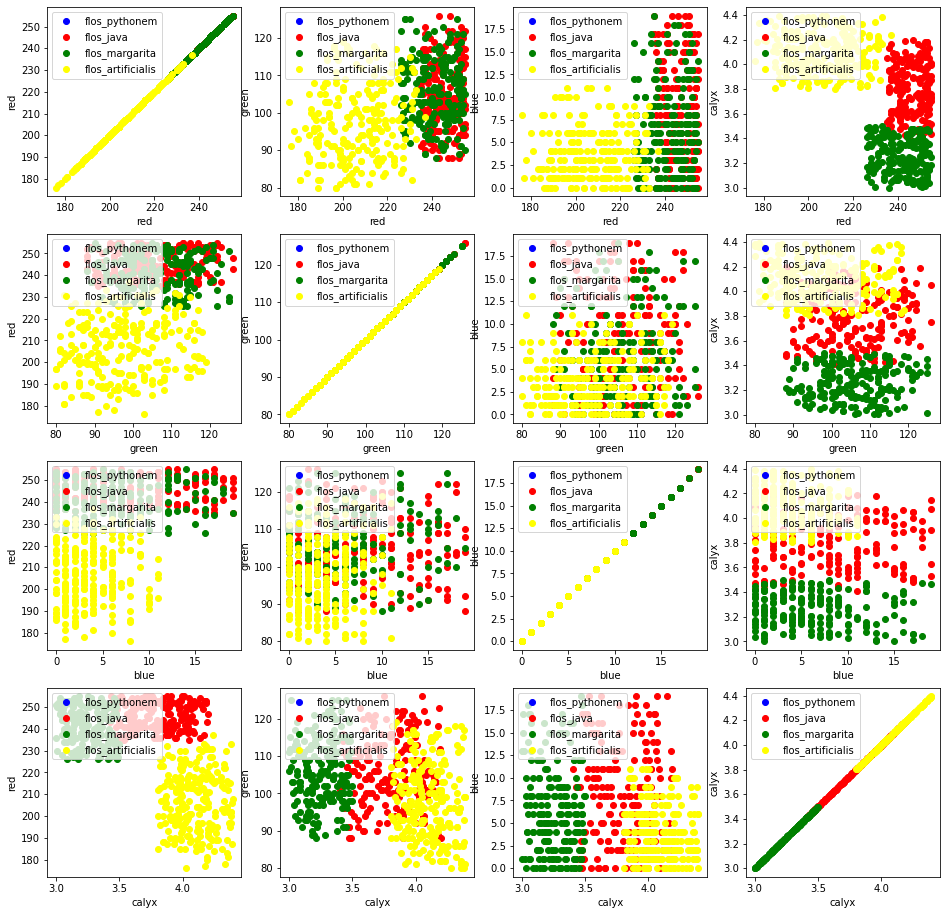

In [3]:
import matplotlib.pyplot as plt

target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))

colors = ['blue', 'red', 'green', 'yellow']

for x in range(n):
    for y in range(n):
        xname = feature_names[x]
        yname = feature_names[y]
        for color_ind in range(len(target_names)):
            ax[x, y].scatter(data[target==color_ind, x], 
                             data[target==color_ind, y],
                             label=target_names[color_ind],
                             c=colors[color_ind])

        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')


plt.show()

### Generate Synthetic Data with Scikit-Learn

It is a lot easier to use the possibilities of Scikit-Learn to create synthetic data.

The functionalities available in sklearn can be grouped into 

1. Generators for classifictation and clustering
2. Generators for creating data for regression
3. Generators for manifold learning¶
4. Generators for decomposition


#### Generators for Classification and Clustering

We start with the the function ```make_blobs``` of ```sklearn.datasets``` to create 'blob' like data distributions. By setting the value of `centers` to `n_classes`, we determine the number of blobs, i.e. the clusters. `n_samples` corresponds to the total number of points equally divided among clusters. If `random_state` is not set, we will have random results every time we call the function. We pass an int to this parameter for reproducible output across multiple function calls.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_classes = 4
data, labels = make_blobs(n_samples=1000, 
                          centers=n_classes, 
                          random_state=100)

labels[:7]

array([1, 3, 1, 3, 1, 3, 2])

We will visualize the previously created blob custers with matplotlib:

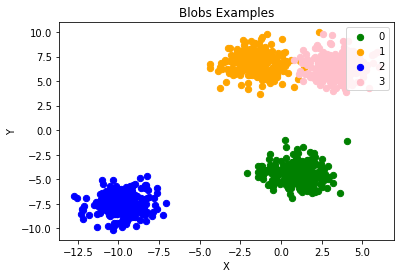

In [15]:
fig, ax = plt.subplots()

colours = ('green', 'orange', 'blue', "pink")
for label in range(n_classes):
    ax.scatter(x=data[labels==label, 0], 
               y=data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label)

ax.set(xlabel='X',
       ylabel='Y',
       title='Blobs Examples')


ax.legend(loc='upper right')

The centers of the blobs were randomly chosen in the previous example. In the following example we set the centers of the blobs explicitly. We create a list with the center points and pass it to the parameter `centers`:

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [[2, 3], [4, 5], [7, 9]]
data, labels = make_blobs(n_samples=1000, 
                          centers=np.array(centers),
                          random_state=1)

labels[:7]

array([0, 1, 1, 0, 2, 2, 2])

Let us have a look at the previously created blob clusters:

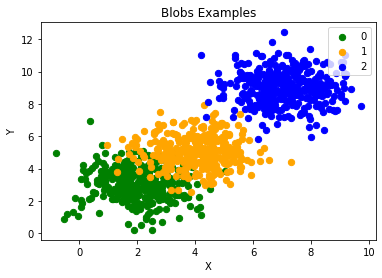

In [19]:
fig, ax = plt.subplots()

colours = ('green', 'orange', 'blue')
for label in range(len(centers)):
    ax.scatter(x=data[labels==label, 0], 
               y=data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label)

ax.set(xlabel='X',
       ylabel='Y',
       title='Blobs Examples')


ax.legend(loc='upper right')

Usually, you want to save your artificially created datasets in a file. For this purpose, we can use the function `savetxt` from numpy. Before we can do this we have to reaarange our data. Each row should contain both the data and the label:

In [22]:
import numpy as np

labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:7]


array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ]])

For some people it might be complicated to understand the combination of reshape and concatenate. Therefore, you can see an extremely simple example in the following code:

In [4]:
import numpy as np

a = np.array( [[1, 2], [3, 4]])
b = np.array( [5, 6])
b = b.reshape((b.shape[0], 1))
print(b)

x = np.concatenate( (a, b), axis=1)
x

[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

We use the numpy function `savetxt` to save the data. Don't worry about the strange name, it is just for fun and for reasons which will be clear soon:

In [23]:
np.savetxt("squirrels.txt", 
           all_data,
           fmt=['%.3f', '%.3f', '%1d'])
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

## Reading the data and conversion back into 'data' and 'labels'

We will demonstrate now, how to read in the data again and how to split it into `data` and `labels` again:

In [6]:
file_data = np.loadtxt("squirrels.txt")

data = file_data[:,:-1]
labels = file_data[:,2:]

labels = labels.reshape((labels.shape[0]))

We had called the data file `squirrels.txt`, because we imagined a strange kind of animal living in the Sahara desert. The x-values stand for the night vision capabilities of the animals and the y-values correspond to the colour of the fur, going from sandish to black. We have three kinds of squirrels, 0, 1, and 2. (Be aware that our squirrals are imaginary squirrels and have nothing to do with the real squirrels of the Sahara!)

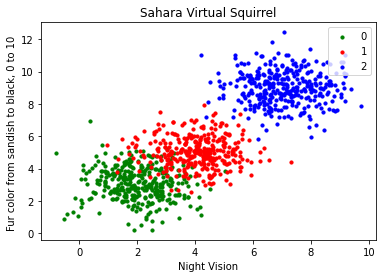

In [7]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))

ax.set(xlabel='Night Vision',
       ylabel='Fur color from sandish to black, 0 to 10 ',
       title='Sahara Virtual Squirrel')


ax.legend(loc='upper right')

We will train our articifical data in the following code:

In [8]:
from sklearn.model_selection import train_test_split

data_sets = train_test_split(data, 
                       labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42 # garantees same output for every run
                      )

train_data, test_data, train_labels, test_labels = data_sets

In [9]:
# import model
from sklearn.neighbors import KNeighborsClassifier

# create classifier
knn = KNeighborsClassifier(n_neighbors=8)

# train
knn.fit(train_data, train_labels)

# test on test data:
calculated_labels = knn.predict(test_data)
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [10]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(test_labels, calculated_labels))

Accuracy: 0.97


## Other Interesting Distributions

In [11]:
import numpy as np


import sklearn.datasets as ds
data, labels = ds.make_moons(n_samples=150, 
                             shuffle=True, 
                             noise=0.19, 
                             random_state=None)

data += np.array(-np.ndarray.min(data[:,0]), 
                 -np.ndarray.min(data[:,1]))

np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])

(0.0, 0.34649342272719386)

[Text(0.5, 0, 'X'), Text(0, 0.5, 'Y'), Text(0.5, 1.0, 'Moons')]

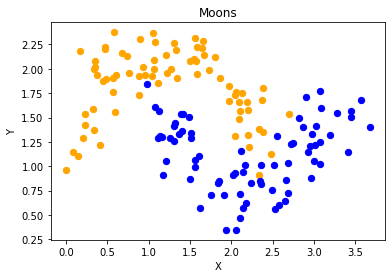

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(data[labels==0, 0], data[labels==0, 1], 
               c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1], 
               c='blue', s=40, label='blues')

ax.set(xlabel='X',
       ylabel='Y',
       title='Moons')


#ax.legend(loc='upper right');

We want to scale values that are in a range ```[min, max]``` in a range ```[a, b]```.



$$f(x) = \frac{(b-a)\cdot(x - min)}{max - min} + a$$

We now use this formula to transform both the X and Y coordinates of ```data``` into other ranges:

In [13]:
min_x_new, max_x_new = 33, 88
min_y_new, max_y_new = 12, 20

data, labels = ds.make_moons(n_samples=100, 
                             shuffle=True, 
                             noise=0.05, 
                             random_state=None)

min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])

#data -= np.array([min_x, 0]) 
#data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), 1])
#data += np.array([min_x_new, 0]) 

#data -= np.array([0, min_y]) 
#data *= np.array([1, (max_y_new - min_y_new) / (max_y - min_y)])
#data += np.array([0, min_y_new]) 



data -= np.array([min_x, min_y]) 
data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), (max_y_new - min_y_new) / (max_y - min_y)])
data += np.array([min_x_new, min_y_new]) 


#np.ndarray.min(data[:,0]), np.ndarray.max(data[:,0])
data[:6]

array([[71.14479608, 12.28919998],
       [62.16584307, 18.75442981],
       [61.02613211, 12.80794358],
       [64.30752046, 12.32563839],
       [81.41469127, 13.64613406],
       [82.03929032, 13.63156545]])

In [14]:
def scale_data(data, new_limits, inplace=False ):
    if not inplace:
        data = data.copy()
    min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
    max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])
    min_x_new, max_x_new = new_limits[0]
    min_y_new, max_y_new = new_limits[1]
    data -= np.array([min_x, min_y]) 
    data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), (max_y_new - min_y_new) / (max_y - min_y)])
    data += np.array([min_x_new, min_y_new]) 
    if inplace:
        return None
    else:
        return data
    
    
data, labels = ds.make_moons(n_samples=100, 
                             shuffle=True, 
                             noise=0.05, 
                             random_state=None)

scale_data(data, [(1, 4), (3, 8)], inplace=True)
data[:10]

array([[1.19312571, 6.70797983],
       [2.74306138, 6.74830445],
       [1.15255757, 6.31893824],
       [1.03927303, 4.83714182],
       [2.91313352, 6.44139267],
       [2.13227292, 5.120716  ],
       [2.65590196, 3.49417953],
       [2.98349928, 5.02232383],
       [3.35660593, 3.34679462],
       [2.15813861, 4.8036458 ]])

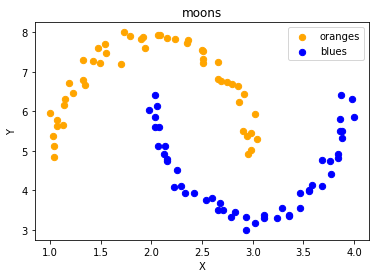

In [15]:
fig, ax = plt.subplots()

ax.scatter(data[labels==0, 0], data[labels==0, 1], 
               c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1], 
               c='blue', s=40, label='blues')

ax.set(xlabel='X',
       ylabel='Y',
       title='moons')
 

ax.legend(loc='upper right');

In [16]:
import sklearn.datasets as ds
data, labels = ds.make_circles(n_samples=100, 
                             shuffle=True, 
                             noise=0.05, 
                             random_state=None)





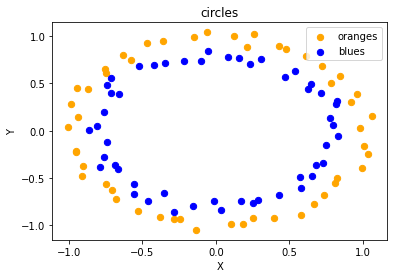

In [17]:
fig, ax = plt.subplots()

ax.scatter(data[labels==0, 0], data[labels==0, 1], 
               c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1], 
               c='blue', s=40, label='blues')

ax.set(xlabel='X',
       ylabel='Y',
       title='circles')


ax.legend(loc='upper right')

Automatically created module for IPython interactive environment


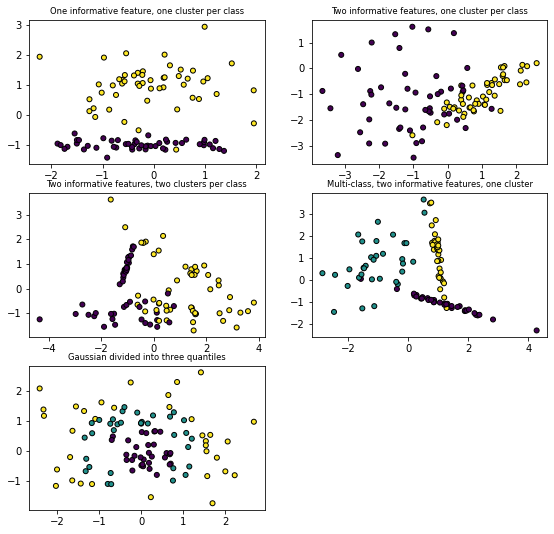

In [18]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(323)
plt.title("Two informative features, two clusters per class",
          fontsize='small')
X2, Y2 = make_classification(n_features=2, 
                             n_redundant=0, 
                             n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small')
X1, Y1 = make_classification(n_features=2, 
                             n_redundant=0, 
                             n_informative=2,
                             n_clusters_per_class=1, 
                             n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')


plt.subplot(325)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.show()

### Exercises

#### Exercise 1

Create two testsets which are separable with a perceptron without a bias node.

#### Exercise 2

Create two testsets which are not separable with a dividing line going through the origin.

#### Exercise 3

Create a dataset with five classes "Tiger", "Lion", "Penguin", "Dolphin", and "Python". The sets should look similar to the following diagram:

<img width="60%" src="../images/testset_blobs_and_circle.webp" srcset="../images/testset_blobs_and_circle_700w.webp 700w,../images/testset_blobs_and_circle_600w.webp 600w,../images/testset_blobs_and_circle_500w.webp 500w,../images/testset_blobs_and_circle_400w.webp 400w,../images/testset_blobs_and_circle_350w.webp 350w,../images/testset_blobs_and_circle_300w.webp 300w" alt="testset_blobs_and_circle.png" />

### Solutions

#### Solution to Exercise 1

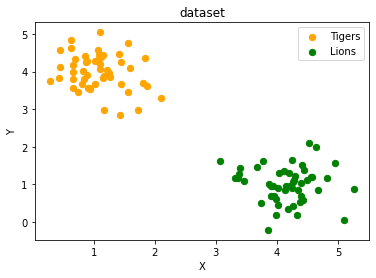

In [19]:
data, labels = make_blobs(n_samples=100, 
                            cluster_std = 0.5,
                            centers=[[1, 4] ,[4, 1]],
                            random_state=1)

fig, ax = plt.subplots()

colours = ["orange", "green"]
label_name = ["Tigers", "Lions"]
for label in range(0, 2):
    ax.scatter(data[labels==label, 0], data[labels==label, 1], 
               c=colours[label], s=40, label=label_name[label])


ax.set(xlabel='X',
       ylabel='Y',
       title='dataset')


ax.legend(loc='upper right')

#### Solution to Exercise 2

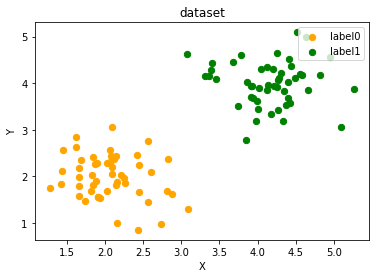

In [20]:
data, labels = make_blobs(n_samples=100, 
                            cluster_std = 0.5,
                            centers=[[2, 2] ,[4, 4]],
                            random_state=1)

fig, ax = plt.subplots()

colours = ["orange", "green"]
label_name = ["label0", "label1"]
for label in range(0, 2):
    ax.scatter(data[labels==label, 0], data[labels==label, 1], 
               c=colours[label], s=40, label=label_name[label])


ax.set(xlabel='X',
       ylabel='Y',
       title='dataset')


ax.legend(loc='upper right')

#### Solution to Exercise 3

In [21]:
import sklearn.datasets as ds
data, labels = ds.make_circles(n_samples=100, 
                               shuffle=True, 
                               noise=0.05, 
                               random_state=42)

centers = [[3, 4], [5, 3], [4.5, 6]]
data2, labels2 = make_blobs(n_samples=100, 
                            cluster_std = 0.5,
                            centers=centers,
                            random_state=1)


for i in range(len(centers)-1, -1, -1):
    labels2[labels2==0+i] = i+2

print(labels2)
labels = np.concatenate([labels, labels2])
data = data * [1.2, 1.8] + [3, 4]

data = np.concatenate([data, data2], axis=0)

[2 4 4 3 4 4 3 3 2 4 4 2 4 4 3 4 2 4 4 4 4 2 2 4 4 3 2 2 3 2 2 3 2 3 3 3 3
 3 4 3 3 2 3 3 3 2 2 2 2 3 4 4 4 2 4 3 3 2 2 3 4 4 3 3 4 2 4 2 4 3 3 4 2 2
 3 4 4 2 3 2 3 3 4 2 2 2 2 3 2 4 2 2 3 3 4 4 2 2 4 3]


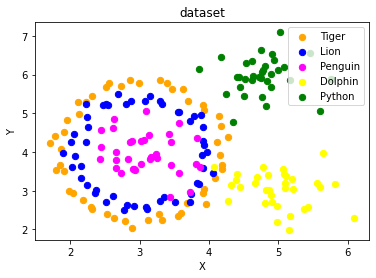

In [22]:
fig, ax = plt.subplots()

colours = ["orange", "blue", "magenta", "yellow", "green"]
label_name = ["Tiger", "Lion", "Penguin", "Dolphin", "Python"]
for label in range(0, len(centers)+2):
    ax.scatter(data[labels==label, 0], data[labels==label, 1], 
               c=colours[label], s=40, label=label_name[label])


ax.set(xlabel='X',
       ylabel='Y',
       title='dataset')


ax.legend(loc='upper right')